<a href="https://colab.research.google.com/github/tony1966/colab/blob/main/reinforcement_learning_ch3_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(train_images, train_labels), (test_images, test_labels)=cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [4]:
print(type(train_images))
print(type(train_labels))
print(type(test_images))
print(type(test_labels))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


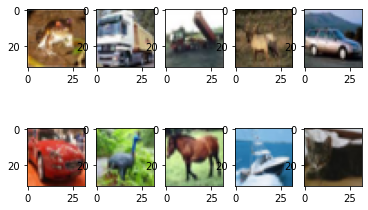

In [6]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i])
plt.show()

In [7]:
print(train_labels[0:10])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


In [8]:
print("轉換前")
print(train_images[0][0][0])
train_images=train_images.astype('float32')/255.0
test_images=test_images.astype('float32')/255.0
print("轉換後")
print(train_images[0][0][0])

轉換前
[59 62 63]
轉換後
[0.23137255 0.24313726 0.24705882]


In [9]:
print("轉換前")
print(train_labels[0]) 
train_labels=to_categorical(train_labels, 10) 
test_labels=to_categorical(test_labels, 10)
print("轉換後") 
print(train_labels [0])

轉換前
[6]
轉換後
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [10]:
model = Sequential()
# 第一個卷積塊 
model.add(Conv2D(32, (3, 3), activation='relu', 
        padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# 第二個卷積塊
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# 密集層
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [11]:
model.compile(loss='categorical_crossentropy', 
      optimizer=Adam(learning_rate=0.001), metrics=['acc'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [13]:
history=model.fit(train_images, train_labels, batch_size=128,
    epochs=20, validation_split=0.1)

Epoch 1/20
352/352 [==============================] - 21s 29ms/step - loss: 1.7000 - acc: 0.3780 - val_loss: 1.3815 - val_acc: 0.5112
Epoch 2/20
352/352 [==============================] - 10s 28ms/step - loss: 1.2818 - acc: 0.5395 - val_loss: 1.0867 - val_acc: 0.6136
Epoch 3/20
352/352 [==============================] - 10s 27ms/step - loss: 1.0952 - acc: 0.6103 - val_loss: 0.9226 - val_acc: 0.6782
Epoch 4/20
352/352 [==============================] - 10s 28ms/step - loss: 0.9746 - acc: 0.6536 - val_loss: 0.8342 - val_acc: 0.7128
Epoch 5/20
352/352 [==============================] - 10s 28ms/step - loss: 0.8752 - acc: 0.6890 - val_loss: 0.7807 - val_acc: 0.7326
Epoch 6/20
352/352 [==============================] - 10s 28ms/step - loss: 0.8120 - acc: 0.7157 - val_loss: 0.7526 - val_acc: 0.7436
Epoch 7/20
352/352 [==============================] - 10s 28ms/step - loss: 0.7528 - acc: 0.7335 - val_loss: 0.7062 - val_acc: 0.7592
Epoch 8/20
352/352 [==============================] - 10s 27ms

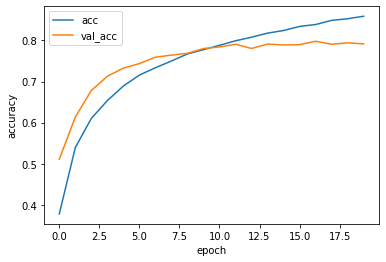

In [14]:
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

In [15]:
test_loss, test_acc=model.evaluate(test_images, test_labels)
print('loss: {:.3f}\nacc: {:.3f}'.format(test_loss, test_acc ))

313/313 [==============================] - 2s 7ms/step - loss: 0.6860 - acc: 0.7827
loss: 0.686
acc: 0.783


In [18]:
# 將測試集前十筆標籤從 ONE-HOT 編碼轉回單一數字
test_ans=np.argmax(test_labels[:10], axis=1)
print(test_ans)
# 以模型預測前十筆測試集圖片
test_predictions=model.predict(test_images[0:10])
test_predictions=np.argmax(test_predictions, axis=1)
print(test_predictions)

[3 8 8 0 6 6 1 6 3 1]
[3 8 8 0 6 6 1 6 3 1]


In [19]:
labels=['airplane', 'automobile', 'bird', 'cat', 'deer',
        'dog', 'frog', 'horse', 'ship', 'truck']
print('前 10 筆預測標籤:',[labels[n] for n in test_predictions])
test_ans=np.argmax(test_labels[:10], axis=1)
print('前 10 筆原始標籤:',[labels[n] for n in test_ans])

前 10 筆預測標籤: ['cat', 'ship', 'ship', 'airplane', 'frog', 'frog', 'automobile', 'frog', 'cat', 'automobile']
前 10 筆原始標籤: ['cat', 'ship', 'ship', 'airplane', 'frog', 'frog', 'automobile', 'frog', 'cat', 'automobile']


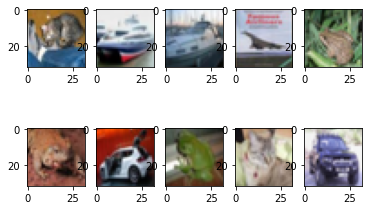

In [20]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_images[i])
plt.show()